# **Author : Satyaprakash Gupta**

GRIP Task 4 : Stock Market Prediction using Numerical and Textual Analysis

In this task I tried to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.  

**Technical Stack : Sikit Learn, Numpy Array, Pandas, Matplotlib, Keras, NLTK, Textblob, Xgboost**

In [1]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### **Step 1 : Importing the Numerical dataset and performing Exploratory Analysis**

In [2]:
# Dataframe for exploratory analysis
df=pd.read_csv('/content/BSESN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


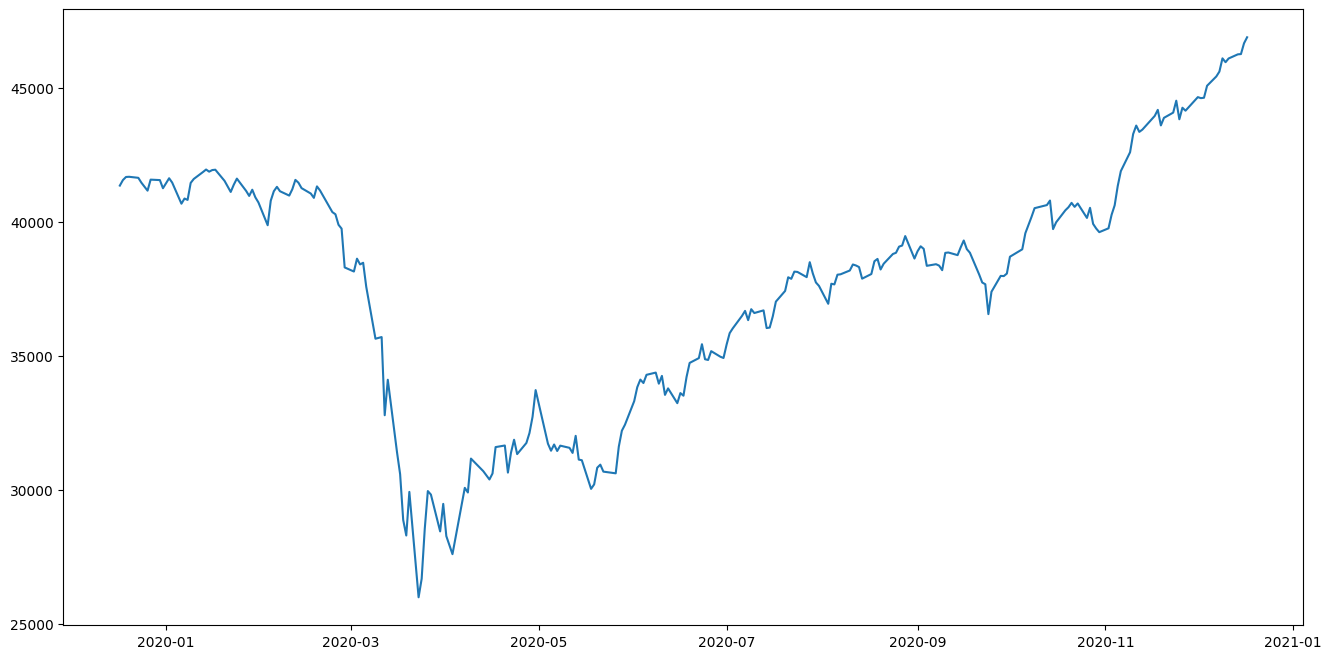

In [3]:
# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')


In [4]:
# fix random seed for reproducibility
np.random.seed(7)

**Step 2 : Creating a dataframe for storing the Closing stock data per day**

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
df2 = pd.read_csv('/content/BSESN.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

**Step 3 : Data Normalization and Division into Training and Test sets**

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [8]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

**Step 4 : Creating a LSTM for Numerical Analysis**

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
163/163 - 6s - loss: 0.0486 - 6s/epoch - 38ms/step
Epoch 2/100
163/163 - 1s - loss: 0.0081 - 1s/epoch - 9ms/step
Epoch 3/100
163/163 - 1s - loss: 0.0045 - 698ms/epoch - 4ms/step
Epoch 4/100
163/163 - 0s - loss: 0.0026 - 469ms/epoch - 3ms/step
Epoch 5/100
163/163 - 0s - loss: 0.0020 - 478ms/epoch - 3ms/step
Epoch 6/100
163/163 - 1s - loss: 0.0019 - 585ms/epoch - 4ms/step
Epoch 7/100
163/163 - 1s - loss: 0.0019 - 623ms/epoch - 4ms/step
Epoch 8/100
163/163 - 1s - loss: 0.0018 - 685ms/epoch - 4ms/step
Epoch 9/100
163/163 - 1s - loss: 0.0018 - 526ms/epoch - 3ms/step
Epoch 10/100
163/163 - 1s - loss: 0.0018 - 622ms/epoch - 4ms/step
Epoch 11/100
163/163 - 1s - loss: 0.0017 - 655ms/epoch - 4ms/step
Epoch 12/100
163/163 - 1s - loss: 0.0018 - 556ms/epoch - 3ms/step
Epoch 13/100
163/163 - 1s - loss: 0.0019 - 567ms/epoch - 3ms/step
Epoch 14/100
163/163 - 1s - loss: 0.0018 - 567ms/epoch - 3ms/step
Epoch 15/100
163/163 - 1s - loss: 0.0018 - 565ms/epoch - 3ms/step
Epoch 16/100
163/163 - 1